# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [181]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [182]:
df = pd.read_csv('./data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.00000000,0.85000000,81.11000000,...,0.00750000,0.00262500,0.02615385,0.00416667,0.02000000,0.00000000,0.00476190,0.03428571,0.01818182,0.00818182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.00000000,0.85000000,81.11000000,...,0.00750000,0.00262500,0.02615385,0.00416667,0.02000000,0.00001778,0.00476190,0.03285714,0.01818182,0.00454545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.00000000,0.28000000,99.48000000,...,0.00000000,0.00018750,0.00384615,0.00083333,0.00333333,0.00000111,0.00000000,0.00428571,0.00000000,0.00090909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.00000000,21.40000000,28.74000000,...,0.09000000,0.06350000,0.29384615,0.02416667,0.44000000,0.00004444,0.05476190,0.55285714,0.26363636,0.24181818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.00000000,23.24000000,29.68000000,...,0.05000000,0.00737500,0.27000000,0.01166667,0.56166667,0.00002667,0.05714286,0.64428571,0.26363636,0.23636364


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [184]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,...,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000,8618.00000000
mean,15467.75736830,226.43861685,11.52391042,10.64702367,21.81906243,6.56025296,2.02324205,93.96878626,0.26436923,1.22525992,...,0.12576526,0.21322248,0.18249862,0.17488077,0.06117612,0.00019131,0.07796500,0.22283758,0.22936264,0.17911053
std,9221.42876571,169.38890981,10.55058979,15.86635269,27.23900036,13.60209836,4.31367030,779.36220496,0.47861408,4.31918263,...,0.46640163,0.30216074,0.34606152,0.43197420,0.16780305,0.00061450,0.13349632,0.29013319,0.51440631,0.30529208
min,1001.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,8695.25000000,93.00000000,2.47000000,0.99250000,0.04000000,0.00000000,0.00000000,0.00000000,0.03425000,0.00000000,...,0.00000000,0.02387500,0.03538462,0.02500000,0.00750000,0.00003333,0.02380952,0.05285714,0.00181818,0.02090909
50%,14273.00000000,191.00000000,8.28500000,5.23500000,8.94500000,0.37000000,0.30000000,1.50000000,0.12000000,0.08000000,...,0.01750000,0.13125000,0.11538462,0.06458333,0.01583333,0.00008778,0.04761905,0.19000000,0.07090909,0.07681818
75%,20050.75000000,336.00000000,19.97750000,13.90000000,32.90000000,5.30000000,2.40000000,21.00000000,0.35500000,1.29750000,...,0.06250000,0.31432813,0.20000000,0.18583333,0.05166667,0.00016083,0.06904762,0.30857143,0.38727273,0.24545455
max,93600.00000000,902.00000000,88.32000000,100.00000000,100.00000000,99.80000000,79.00000000,30000.00000000,12.00000000,98.89000000,...,14.70250000,7.96875000,13.46153846,19.47916667,6.13666667,0.01672222,1.85952381,14.16857143,34.85454545,8.26818182


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

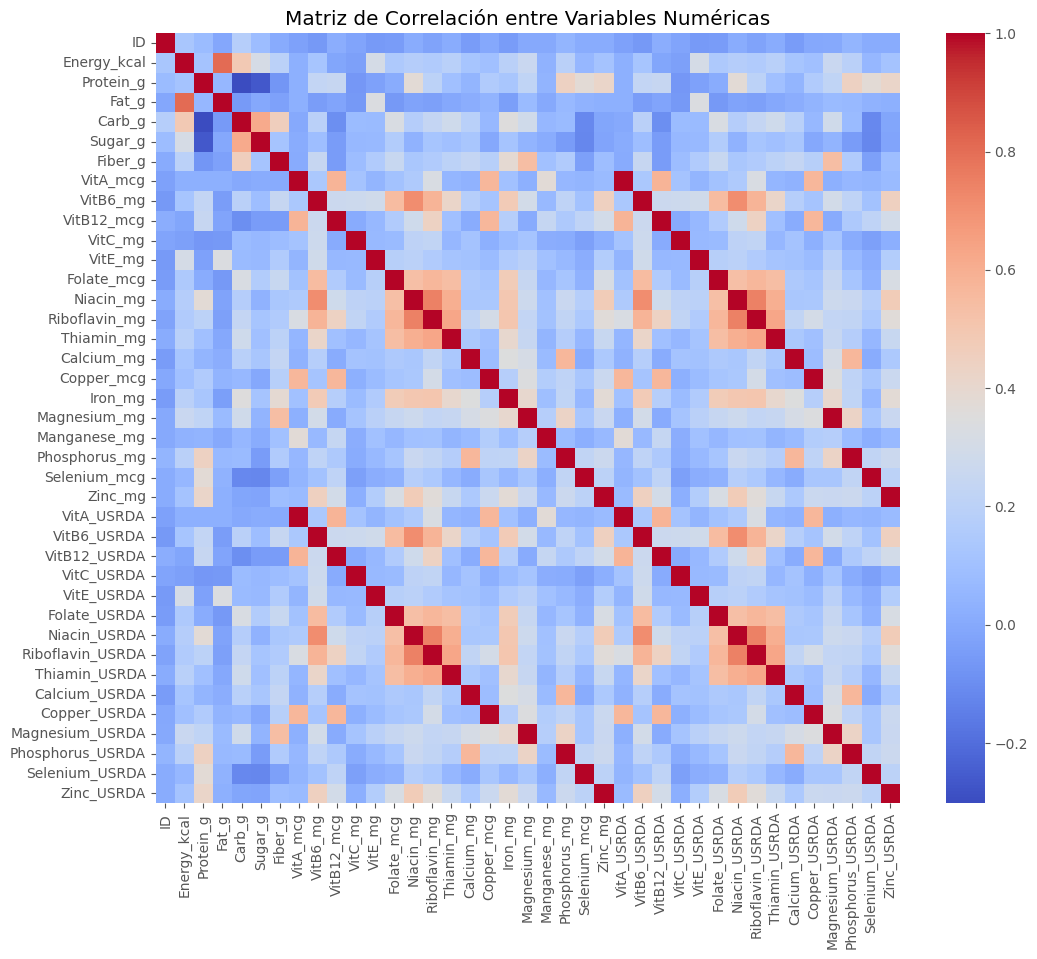

In [187]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [188]:
usrda_columns = [col for col in numeric_columns if 'USRDA' in col]
usrda_correlation = correlation_matrix.loc[usrda_columns, usrda_columns]
usrda_correlation

,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
VitA_USRDA,1.00000000,0.13660460,0.58100380,0.11127896,0.04412887,0.10851716,0.15167895,0.32570947,0.05292064,0.03482231,0.56994469,0.02457207,0.05581379,0.04804330,0.07054133
VitB6_USRDA,0.13660460,1.00000000,0.26432492,0.27130494,0.28606522,0.55008721,0.71414254,0.58167759,0.41701142,0.17726805,0.11632649,0.29316852,0.21339534,0.10900373,0.44714317
VitB12_USRDA,0.58100380,0.26432492,1.00000000,0.00726442,0.06061771,0.15848272,0.27903263,0.43618232,0.09960121,0.01171487,0.57064191,0.00412417,0.14877403,0.21530805,0.29813609
VitC_USRDA,0.11127896,0.27130494,0.00726442,1.00000000,0.06688547,0.07279688,0.20910661,0.22592752,0.05698702,0.11182511,0.02545998,0.11522156,0.01200010,-0.03521779,0.01847551
VitE_USRDA,0.04412887,0.28606522,0.06061771,0.06688547,1.00000000,0.18396788,0.19697151,0.15716323,0.11931278,0.10967064,0.07450423,0.19520515,0.06825064,0.01562482,0.16709339
Folate_USRDA,0.10851716,0.55008721,0.15848272,0.07279688,0.18396788,1.00000000,0.53513248,0.57074840,0.53882926,0.14943788,0.12111413,0.24279697,0.12192927,0.03483891,0.31958006
Niacin_USRDA,0.15167895,0.71414254,0.27903263,0.20910661,0.19697151,0.53513248,1.00000000,0.74673618,0.60182914,0.13328742,0.13847660,0.27179013,0.25687949,0.17888364,0.47164204
Riboflavin_USRDA,0.32570947,0.58167759,0.43618232,0.22592752,0.15716323,0.57074840,0.74673618,1.00000000,0.63371935,0.22216460,0.30076296,0.22921611,0.22396743,0.14074187,0.36761097
Thiamin_USRDA,0.05292064,0.41701142,0.09960121,0.05698702,0.11931278,0.53882926,0.60182914,0.63371935,1.00000000,0.13584593,0.09965888,0.24402692,0.17458856,0.05569799,0.24940236
Calcium_USRDA,0.03482231,0.17726805,0.01171487,0.11182511,0.10967064,0.14943788,0.13328742,0.22216460,0.13584593,1.00000000,0.08329911,0.31279371,0.56878450,0.00942358,0.14072515


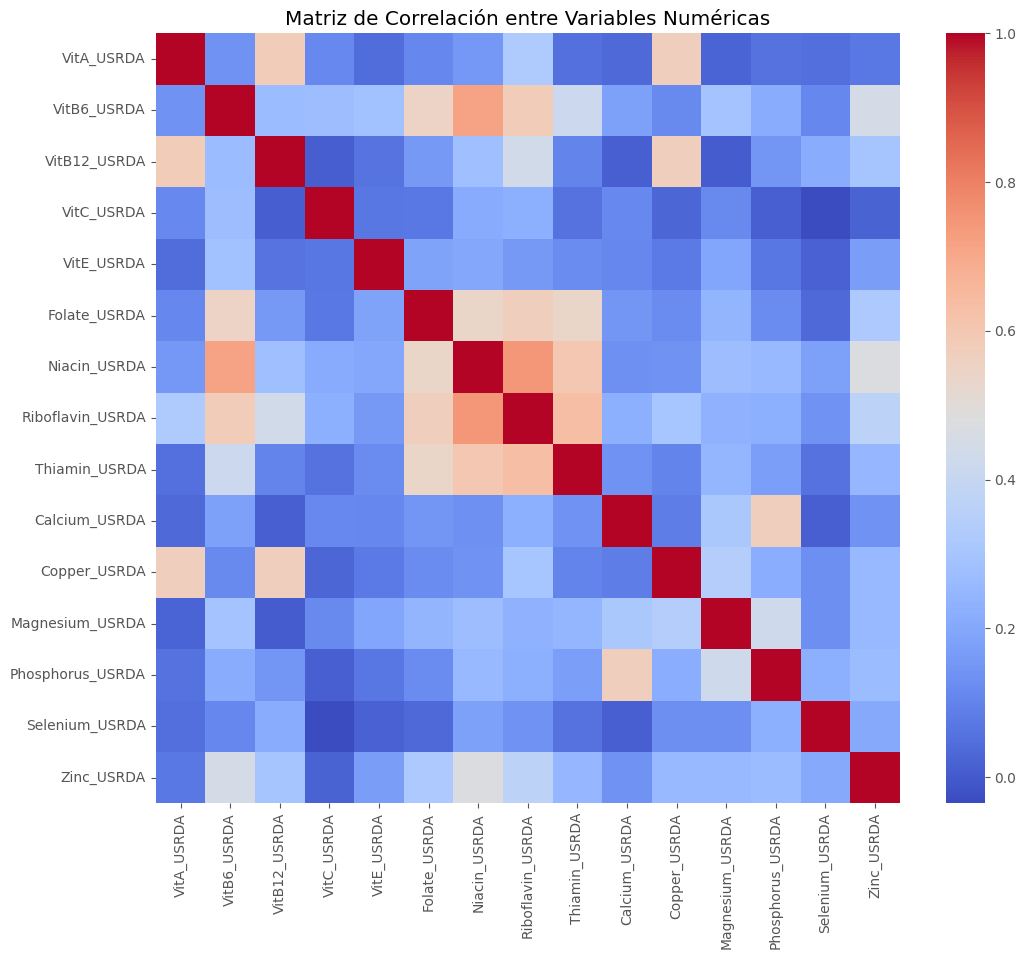

In [189]:
plt.figure(figsize=(12, 10))
sns.heatmap(usrda_correlation, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Variables no numéricas
Elimina las variables de texto del dataset

In [190]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [191]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   Energy_kcal       8618 non-null   float64
 2   Protein_g         8618 non-null   float64
 3   Fat_g             8618 non-null   float64
 4   Carb_g            8618 non-null   float64
 5   Sugar_g           8618 non-null   float64
 6   Fiber_g           8618 non-null   float64
 7   VitA_mcg          8618 non-null   float64
 8   VitB6_mg          8618 non-null   float64
 9   VitB12_mcg        8618 non-null   float64
 10  VitC_mg           8618 non-null   float64
 11  VitE_mg           8618 non-null   float64
 12  Folate_mcg        8618 non-null   float64
 13  Niacin_mg         8618 non-null   float64
 14  Riboflavin_mg     8618 non-null   float64
 15  Thiamin_mg        8618 non-null   float64
 16  Calcium_mg        8618 non-null   float64


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [192]:
df_numeric = df_numeric.applymap(lambda x: np.log1p(x) if x >= 0 else np.nan)
print(df_numeric.head())


          ID  Energy_kcal  Protein_g      Fat_g     Carb_g    Sugar_g  \
0 6.90975328   6.57646957 0.61518564 4.40805981 0.05826891 0.05826891   
1 6.91075079   6.57646957 0.61518564 4.40805981 0.05826891 0.05826891   
2 6.91174730   6.77650699 0.24686008 4.60995870 0.00000000 0.00000000   
3 6.91274282   5.86929691 3.10906096 3.39249294 1.20597081 0.40546511   
4 6.91373735   5.91889385 3.18800416 3.42361098 1.33236602 0.41210965   

     Fiber_g   VitA_mcg   VitB6_mg  VitB12_mcg  ...  Folate_USRDA  \
0 0.00000000 6.52941884 0.00299551  0.15700375  ...    0.00747201   
1 0.00000000 6.52941884 0.00299551  0.12221763  ...    0.00747201   
2 0.00000000 6.73459166 0.00099950  0.00995033  ...    0.00000000   
3 0.00000000 5.29330482 0.15357909  0.79750720  ...    0.08617770   
4 0.00000000 5.68017261 0.06297480  0.81536481  ...    0.04879016   

   Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0    0.00262156        0.02581768     0.00415801     0.01980263  

In [193]:
print(df_numeric.isna().sum())

ID                  0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64


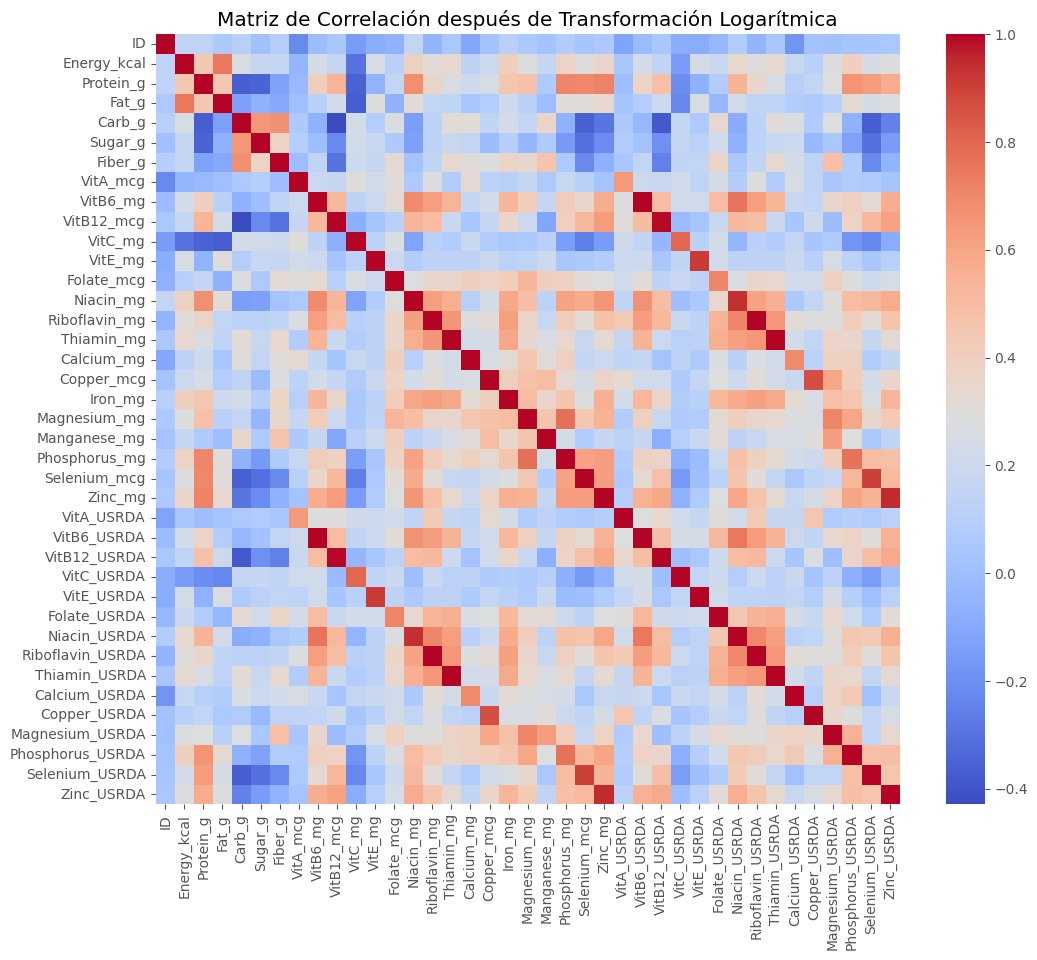

In [194]:
correlation_matrix_log = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_log, annot=False, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación después de Transformación Logarítmica')
plt.show()

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()
df_numeric_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), 
                                       columns=df_numeric.columns, 
                                       index=df_numeric.index)

In [197]:
print(df_numeric_standardized.head())

           ID  Energy_kcal   Protein_g      Fat_g      Carb_g     Sugar_g  \
0 -3.48071717   1.54041394 -1.37969871 2.22252572 -1.27933898 -0.75138074   
1 -3.47934263   1.54041394 -1.37969871 2.22252572 -1.27933898 -0.75138074   
2 -3.47796946   1.74566103 -1.72821981 2.39348953 -1.31552154 -0.79696308   
3 -3.47659765   0.81482407  0.98008369 1.36256470 -0.56666385 -0.47977766   
4 -3.47522721   0.86571269  1.05478221 1.38891481 -0.48817768 -0.47457980   

      Fiber_g   VitA_mcg    VitB6_mg  VitB12_mcg  ...  Folate_USRDA  \
0 -0.81781776 2.36310494 -0.81136575 -0.45374885  ...   -0.37098224   
1 -0.81781776 2.36310494 -0.81136575 -0.50689362  ...   -0.37098224   
2 -0.81781776 2.46347195 -0.81968137 -0.67841090  ...   -0.40651444   
3 -0.81781776 1.75841923 -0.18401577  0.52478545  ...    0.00329242   
4 -0.81781776 1.94766830 -0.56148454  0.55206757  ...   -0.17449914   

   Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0   -0.90874703       -0.6576

In [198]:
print("Media estandarización:")
print(df_numeric_standardized.mean())
print("\nDesviación estándar después de estandarización:")
print(df_numeric_standardized.std())

Media estandarización:
ID                  0.00000000
Energy_kcal        -0.00000000
Protein_g           0.00000000
Fat_g               0.00000000
Carb_g              0.00000000
Sugar_g            -0.00000000
Fiber_g            -0.00000000
VitA_mcg            0.00000000
VitB6_mg            0.00000000
VitB12_mcg         -0.00000000
VitC_mg             0.00000000
VitE_mg             0.00000000
Folate_mcg          0.00000000
Niacin_mg           0.00000000
Riboflavin_mg       0.00000000
Thiamin_mg         -0.00000000
Calcium_mg          0.00000000
Copper_mcg         -0.00000000
Iron_mg            -0.00000000
Magnesium_mg        0.00000000
Manganese_mg        0.00000000
Phosphorus_mg      -0.00000000
Selenium_mcg       -0.00000000
Zinc_mg             0.00000000
VitA_USRDA          0.00000000
VitB6_USRDA        -0.00000000
VitB12_USRDA        0.00000000
VitC_USRDA          0.00000000
VitE_USRDA          0.00000000
Folate_USRDA       -0.00000000
Niacin_USRDA        0.00000000
Riboflavin_USRDA

In [199]:
df_numeric_standardized

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,-3.48071717,1.54041394,-1.37969871,2.22252572,-1.27933898,-0.75138074,-0.81781776,2.36310494,-0.81136575,-0.45374885,...,-0.37098224,-0.90874703,-0.65763373,-0.66200366,-0.30823899,-0.31258755,-0.65734664,-0.93528923,-0.72885913,-0.76704317
1,-3.47934263,1.54041394,-1.37969871,2.22252572,-1.27933898,-0.75138074,-0.81781776,2.36310494,-0.81136575,-0.50689362,...,-0.37098224,-0.90874703,-0.65763373,-0.66200366,-0.30823899,-0.28350925,-0.65734664,-0.94379087,-0.72885913,-0.78722770
2,-3.47796946,1.74566103,-1.72821981,2.39348953,-1.31552154,-0.79696308,-0.81781776,2.46347195,-0.81968137,-0.67841090,...,-0.40651444,-0.92173857,-0.77785725,-0.67885868,-0.46412243,-0.31077014,-0.70559237,-1.11633899,-0.81146808,-0.80748542
3,-3.47659765,0.81482407,0.98008369,1.36256470,-0.56666385,-0.47977766,-0.81781776,1.75841923,-0.18401577,0.52478545,...,0.00329242,-0.59414302,0.61030953,-0.56203376,2.95461094,-0.23989276,-0.16414028,1.56436245,0.26131584,0.39724900
4,-3.47522721,0.86571269,1.05478221,1.38891481,-0.48817768,-0.47457980,-0.81781776,1.94766830,-0.56148454,0.55206757,...,-0.17449914,-0.88352067,0.50855535,-0.62428353,3.72207139,-0.26897029,-0.14124127,1.91625463,0.26131584,0.37265881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,2.60744252,0.66531742,0.84889207,1.25201120,-1.31552154,-0.79696308,-0.81781776,1.06275051,0.60759215,3.22500944,...,-0.23145037,0.07810239,-0.05268912,-0.59929181,0.01098828,-0.13085663,0.65051326,0.76158385,3.07549632,-0.28015272
8614,2.72085961,-0.36594473,0.94303942,-0.99379129,-0.16186824,-0.79696308,-0.81781776,-0.29355219,-0.38156879,1.05934074,...,-0.17449914,-0.57535611,-0.69879231,-0.63264156,-0.41708715,-0.25261412,0.15184052,1.78118250,0.71324975,-0.07617645
8615,2.72451954,0.53689460,-1.96180649,-1.51012816,1.35829747,2.57211299,-0.81781776,-0.83097442,-0.82384541,-0.69361259,...,-0.40651444,-0.88948457,-0.55204864,-0.16168243,-0.39365691,-0.27623975,-0.46662354,-1.07274606,-0.75348590,-0.71689864
8616,2.72573736,-0.57899174,0.72461786,-0.76879934,-0.63332902,-0.79696308,-0.81781776,0.84887304,-0.31467151,-0.07416001,...,-0.33571357,-0.47503390,-0.31589901,-0.64101339,-0.41708715,0.41421501,4.03735616,0.87655799,1.04189618,-0.32651035


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [200]:
pca = PCA()
pca.fit(df_numeric_standardized)

PCA()

In [201]:
pca_result = pca.transform(df_numeric_standardized)

In [202]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(df_numeric_standardized.shape[1])])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-2.87294913,-0.04170837,-1.05956352,2.07171691,4.31602185,-1.09165679,1.94704113,1.69191568,-1.72767678,0.73911159,...,0.05649306,0.12915564,0.14930193,-0.41750843,-0.13330482,-0.14858244,0.01705938,-0.01862978,-0.00401367,0.00219340
1,-2.85639730,0.01707971,-1.02559343,2.06733762,4.30447946,-1.03473329,1.96287059,1.69280245,-1.74632093,0.75813927,...,0.04474045,0.13782697,0.13338543,-0.39500772,-0.15472232,-0.17571496,0.01133734,-0.01646730,-0.00355418,0.00182596
2,-3.78393981,0.01964410,-1.71322166,1.63042998,5.21488411,-0.21049586,1.93773894,1.49059406,-2.08295263,0.98160646,...,0.09219040,0.11996831,-0.06551854,-0.43574286,-0.00384148,-0.10795057,-0.00605027,-0.01453353,-0.00170496,0.00149720
3,1.66108600,-0.84872555,0.58272969,2.81580598,1.03257552,-3.94550466,2.63795916,-0.05328082,-1.99290826,-0.61796731,...,-0.03399642,-0.09509401,-0.07044773,0.03435831,0.12468351,0.00362892,-0.00082418,-0.00368158,0.00236403,-0.01728570
4,1.41413865,-0.68880732,0.94022812,3.34574057,1.22215589,-4.34855385,3.25441552,-0.48359096,-2.02758271,-0.63303668,...,0.01045202,-0.11665596,-0.08098533,0.09421842,-0.16968510,0.10646938,0.02496955,-0.00789185,-0.01751902,-0.01822258


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

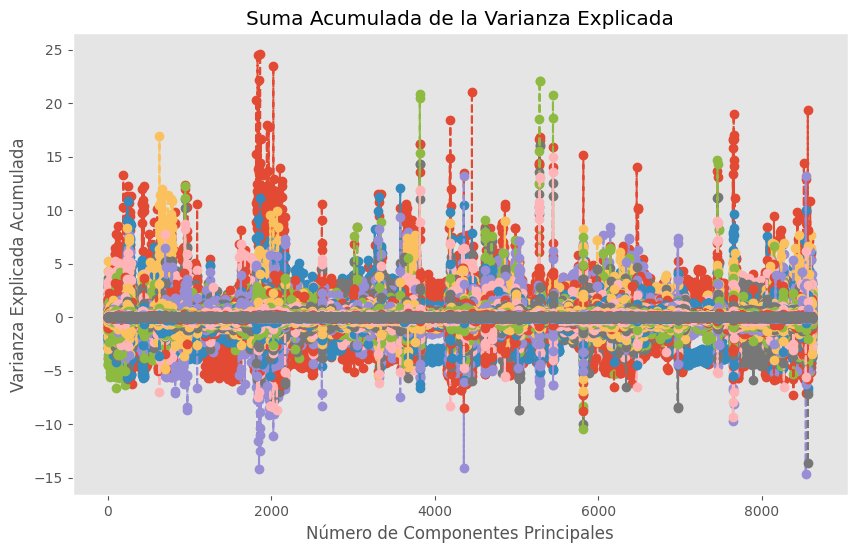

In [203]:
# Este gráfico no está correcto, 
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_result)+1),
         pca_result, marker='o', linestyle='--')
plt.title('Suma Acumulada de la Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

In [204]:
# Así conseguimos la varianza explicada acumulada
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
print(f"\nVarianza explicada acumulada con todos los componentes principales: {explained_variance_ratio_cumsum[-1] * 100:.2f}%")


Varianza explicada acumulada con todos los componentes principales: 100.00%


In [205]:
explained_variance_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Varianza Explicada (%)': pca.explained_variance_ratio_ * 100,
    'Varianza Explicada Acumulada (%)': explained_variance_ratio_cumsum * 100
})


In [206]:
print(explained_variance_df.head())

  Componente  Varianza Explicada (%)  Varianza Explicada Acumulada (%)
0        PC1             30.81043843                       30.81043843
1        PC2             13.44053168                       44.25097011
2        PC3              7.85798206                       52.10895217
3        PC4              6.32505718                       58.43400935
4        PC5              5.44963646                       63.88364581


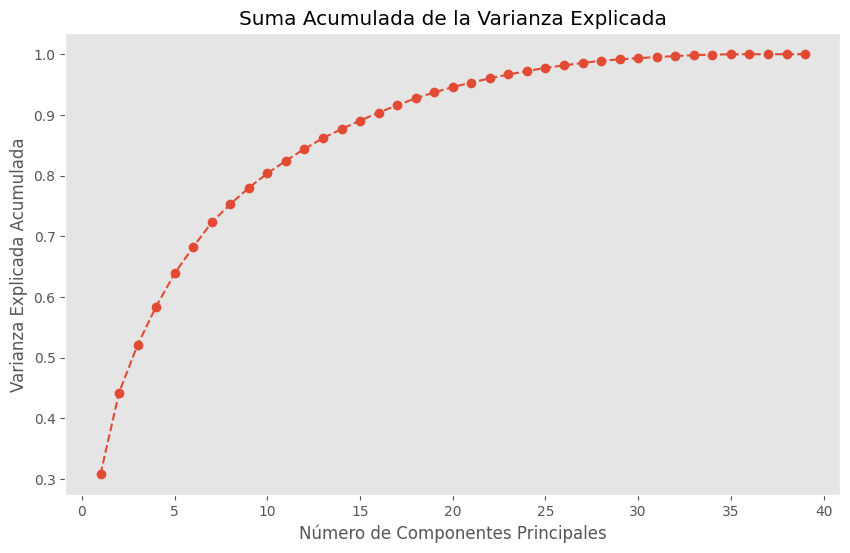

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum)+1),
         explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.title('Suma Acumulada de la Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

In [208]:
# Nos quedaríamos entre los 10 y 12 componentes principales.

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [209]:
X = 8

In [210]:
pca_selected = PCA(n_components=X)

In [211]:
# Transformamos los datos con el nuevo PCA
pca_selected_result = pca_selected.fit_transform(df_numeric_standardized)

In [212]:
pca_selected_df = pd.DataFrame(data=pca_selected_result, 
                               columns=[f'PC{i+1}' for i in range(X)])

In [213]:
print(pca_selected_df.head())

          PC1         PC2         PC3        PC4        PC5         PC6  \
0 -2.87294913 -0.04170837 -1.05956352 2.07171691 4.31602185 -1.09165679   
1 -2.85639730  0.01707971 -1.02559343 2.06733762 4.30447946 -1.03473329   
2 -3.78393981  0.01964410 -1.71322166 1.63042998 5.21488411 -0.21049586   
3  1.66108600 -0.84872555  0.58272969 2.81580598 1.03257552 -3.94550466   
4  1.41413865 -0.68880732  0.94022812 3.34574057 1.22215589 -4.34855385   

         PC7         PC8  
0 1.94704113  1.69191568  
1 1.96287059  1.69280245  
2 1.93773894  1.49059406  
3 2.63795916 -0.05328082  
4 3.25441552 -0.48359096  


In [215]:
pca_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     8618 non-null   float64
 1   PC2     8618 non-null   float64
 2   PC3     8618 non-null   float64
 3   PC4     8618 non-null   float64
 4   PC5     8618 non-null   float64
 5   PC6     8618 non-null   float64
 6   PC7     8618 non-null   float64
 7   PC8     8618 non-null   float64
dtypes: float64(8)
memory usage: 538.8 KB


In [214]:
# Visualizamos la varianza explicada acumulada con los X componentes
explained_variance_cumsum = pca_selected.explained_variance_ratio_.cumsum()
print(f"\nVarianza explicada acumulada con {X} componentes principales: {explained_variance_cumsum[-1] * 100:.2f}%")


Varianza explicada acumulada con 8 componentes principales: 75.29%
